# Problem 2

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_trials=50
not_exciting=np.array([4,15,22,7,2])/N_trials
exciting=np.array([2,4,8,10,26])/N_trials


In [3]:
FP, TP=[], []
for i in range(1,5):
    TP.append(np.sum(exciting[-i:]))
    j=5-i
    FP.append(np.sum(not_exciting[-i:]))

In [4]:
TP=np.array(TP)
FP=np.array(FP)
TP.sort()
FP.sort()

In [5]:
print(TP)
print(FP)

[0.52 0.72 0.88 0.96]
[0.04 0.18 0.62 0.92]


In [6]:
def ROC_curve(sigma, mu):
    x=np.linspace(0,1,100)
    y=[]
    for i in x:
        y.append((1/sigma)*norm.ppf(i, 0, 1) + mu/sigma)
    y_fp=[]
    for i in y:
        y_fp.append(norm.cdf(i,0,1))
    return x, y_fp

In [7]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
FP_trans=[norm.ppf(i,0,1) for i in FP]
TP_trans=[norm.ppf(i,0,1) for i in TP]
regression.fit(np.array(FP_trans).reshape(-1, 1), TP_trans)
a = regression.coef_[0]
b = regression.intercept_

sigma=1/a
mu=b*sigma

print(sigma)
print(mu)

1.8841769673530626
1.9151647510430854


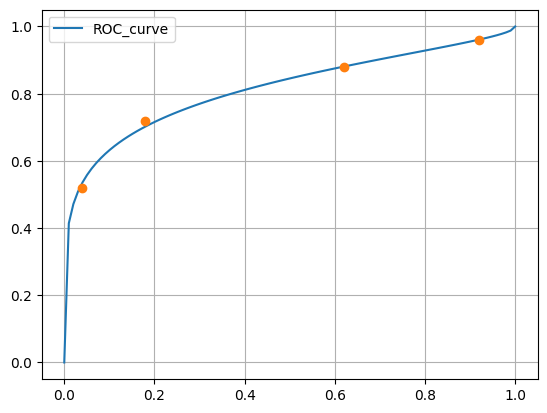

In [8]:
x,y=ROC_curve(sigma,mu)
plt.plot(x,y,label="ROC_curve")
plt.plot(FP, TP, 'o')
plt.legend()
plt.grid(True)
plt.show()

##### Rebin the data 1


In [9]:
exciting=np.array([2, 48])/N_trials
not_exciting=np.array([4, 46])/N_trials

In [10]:
def sensitivity(ptp, pfp):
    return norm.ppf(ptp, 0, 1)-norm.ppf(pfp, 0, 1)

In [11]:
TP=exciting[1]
FP=not_exciting[1]
d=sensitivity(TP, FP)
print(d)

0.34561451094253637


##### Rebin the data 2

In [12]:
exciting=np.array([24, 26])/N_trials
not_exciting=np.array([48, 2])/N_trials

In [13]:
TP=exciting[1]
FP=not_exciting[1]
d=sensitivity(TP, FP)
print(d)

1.8008396547169037


I get very different es@mates of d’ depending on which critera I use. This should NOT be the 
case. It indicates that the equal variance model does NOT hold. In agreement with this the 
es@mate for sigma when fiZng the roc curve was sigma =1.8842 > 1 which also indicates 
that the equal variance model does NOT hold 

# Problem 4

In [14]:
archivo = "Data/image1.txt"
image1 = np.loadtxt(archivo)

archivo = "Data/image2.txt"
image2 = np.loadtxt(archivo)

archivo = "Data/image3.txt"
image3 = np.loadtxt(archivo)


archivo = "Data/mean_image.txt"
mean_image = np.loadtxt(archivo)

archivo = "Data/PCA_Components.txt"
PCA_Components = np.loadtxt(archivo)

archivo = "Data/PCA_Scores.txt"
PCA_Scores = np.loadtxt(archivo)

archivo = "Data/RegressionIntercept.txt"
RegressionIntercept = np.loadtxt(archivo)

archivo = "Data/RegressionParameters.txt"
RegressionParameters = np.loadtxt(archivo)

archivo = "Data/SmileIndx.txt"
SmileIndx = np.loadtxt(archivo)

In [15]:
def reconstruct(vector):
    matrix = vector.reshape((360, 260))
    #matrix=np.transpose(matrix)
    return matrix

def reconstruct_mean(vector, mean):
    matrix = vector.reshape((260, 360)).T
    #matrix=np.transpose(matrix)
    matrix+=mean
    return matrix

def show_im(matrix):
    plt.imshow(matrix, cmap='gray')

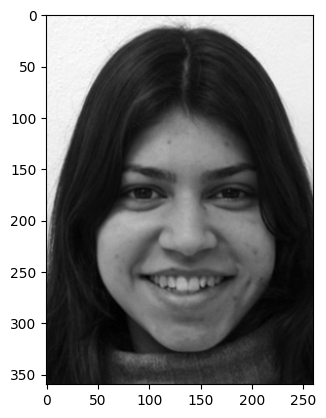

In [16]:
show_im(reconstruct(image1))

##### a) Predicted parameters

In [17]:
predicted=np.dot(PCA_Scores, RegressionParameters) + RegressionIntercept
print(predicted)
print(SmileIndx)

[0.24085966 1.08786716 0.65329367]
[ 3.3794417  1.0692027 -1.8308037]


##### b) PCA Scores

(93600, 3)


Text(0.5, 1.0, '-1.8308037')

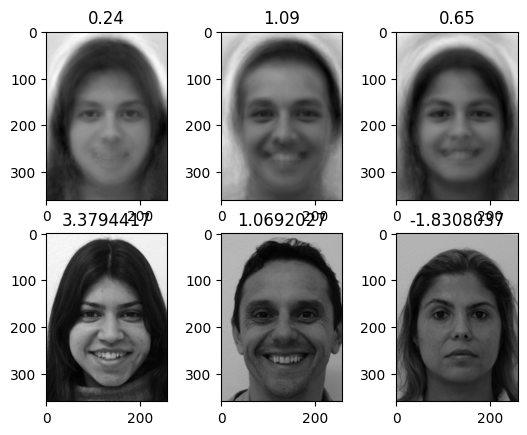

In [18]:
reconstructed=np.dot(PCA_Components, PCA_Scores.T)
print(reconstructed.shape)
for i in range(1,4):
    plt.subplot(2,3,i)
    show_im(reconstruct_mean(reconstructed[:,i-1],mean_image))
    plt.title(f"{predicted[i-1]:.2f}")

plt.subplot(2,3,4)
show_im(reconstruct(image1))
plt.title(SmileIndx[0])

plt.subplot(2,3,5)
show_im(reconstruct(image2))
plt.title(SmileIndx[1])

plt.subplot(2,3,6)
show_im(reconstruct(image3))
plt.title(SmileIndx[2])

We see that the model seems to be right according to the reconstructions, which is the data 
that was used to fit the model. The smiles of images 1 and 3 has been altered by dimension 
reduction

##### c) Synthetic images to create similes

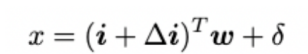

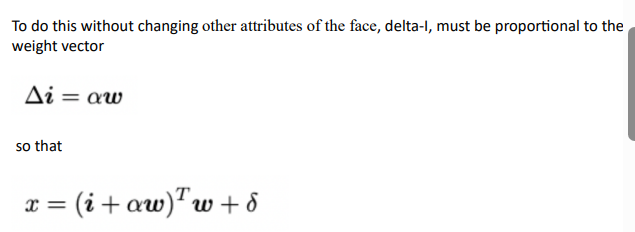

In [19]:
def resolver_ecuacion_matricial(x, I, a, w, δ):
  """
  Resuelve la ecuación matricial x = (I + aw)w + δ.

  Args:
    x: La matriz x.
    I: La matriz identidad.
    a: El escalar a.
    w: La matriz w.
    δ: La matriz δ.

  Returns:
    El escalar a.
  """

  # Calculamos la matriz (I + aw).
  I_aw = I + a * w

  # Resolvemos la ecuación x = (I + aw)w + δ.
  a = np.linalg.solve(I_aw, x - δ)

  return a


In [20]:
from scipy.optimize import minimize

In [21]:
def eq(a, I, w, delta,x):
    t=np.transpose(I + a*w)
    derecha=np.dot(t,w)+delta
    epsilon=np.abs(x- derecha)**2
    return epsilon

In [22]:
initial_guess=1
I=RegressionParameters
delta=RegressionIntercept
w=PCA_Scores[0]
x=0.2
optimized_parameters = minimize(eq, initial_guess, args=(I, w, delta,x)) 

alfa=optimized_parameters.x

print(alfa)
print(eq(alfa, I, w, delta,x))



[-9.46805771e-06]
1.0354563120947199e-09


In [23]:
t=np.transpose(I + alfa*w)
derecha=np.dot(t,w)+delta
print(derecha)

0.19996782149301018


(93600, 20)
[-0.08839224 -0.08859868 -0.09498947 ...  0.1333537   0.13367112
  0.12915535]


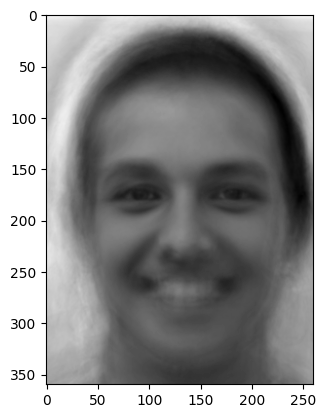

In [24]:
alfa=1
new_score=RegressionParameters + alfa*PCA_Scores[1]
print(PCA_Components.shape)
new_reconstructed=np.dot(PCA_Components, new_score.T)
print(new_reconstructed)
show_im(reconstruct_mean(new_reconstructed,mean_image))

In [25]:
print(new_score)

[  7.39197552   9.25772561 -14.32636441  -4.16116542 -15.90363562
   7.11965388  17.91693647  16.81127876   2.26104464  -2.45461287
   8.13102158  -1.30832249  -2.5331376    5.1894407   -4.16000459
   0.66524667  -3.76826461  -0.90969321   0.3796757   -7.71866425]
